In [1]:
import os
import pandas as pd
import numpy as np
import sklearn as skl
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
HOUSING_DATA_PATH = os.path.join("datasets", "housing")
HOUSING_DATA_FILE = os.path.join(HOUSING_DATA_PATH, "housing.csv")

In [3]:
def load_housing_data(housing_data_file=HOUSING_DATA_FILE):
    return pd.read_csv(housing_data_file)

In [4]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

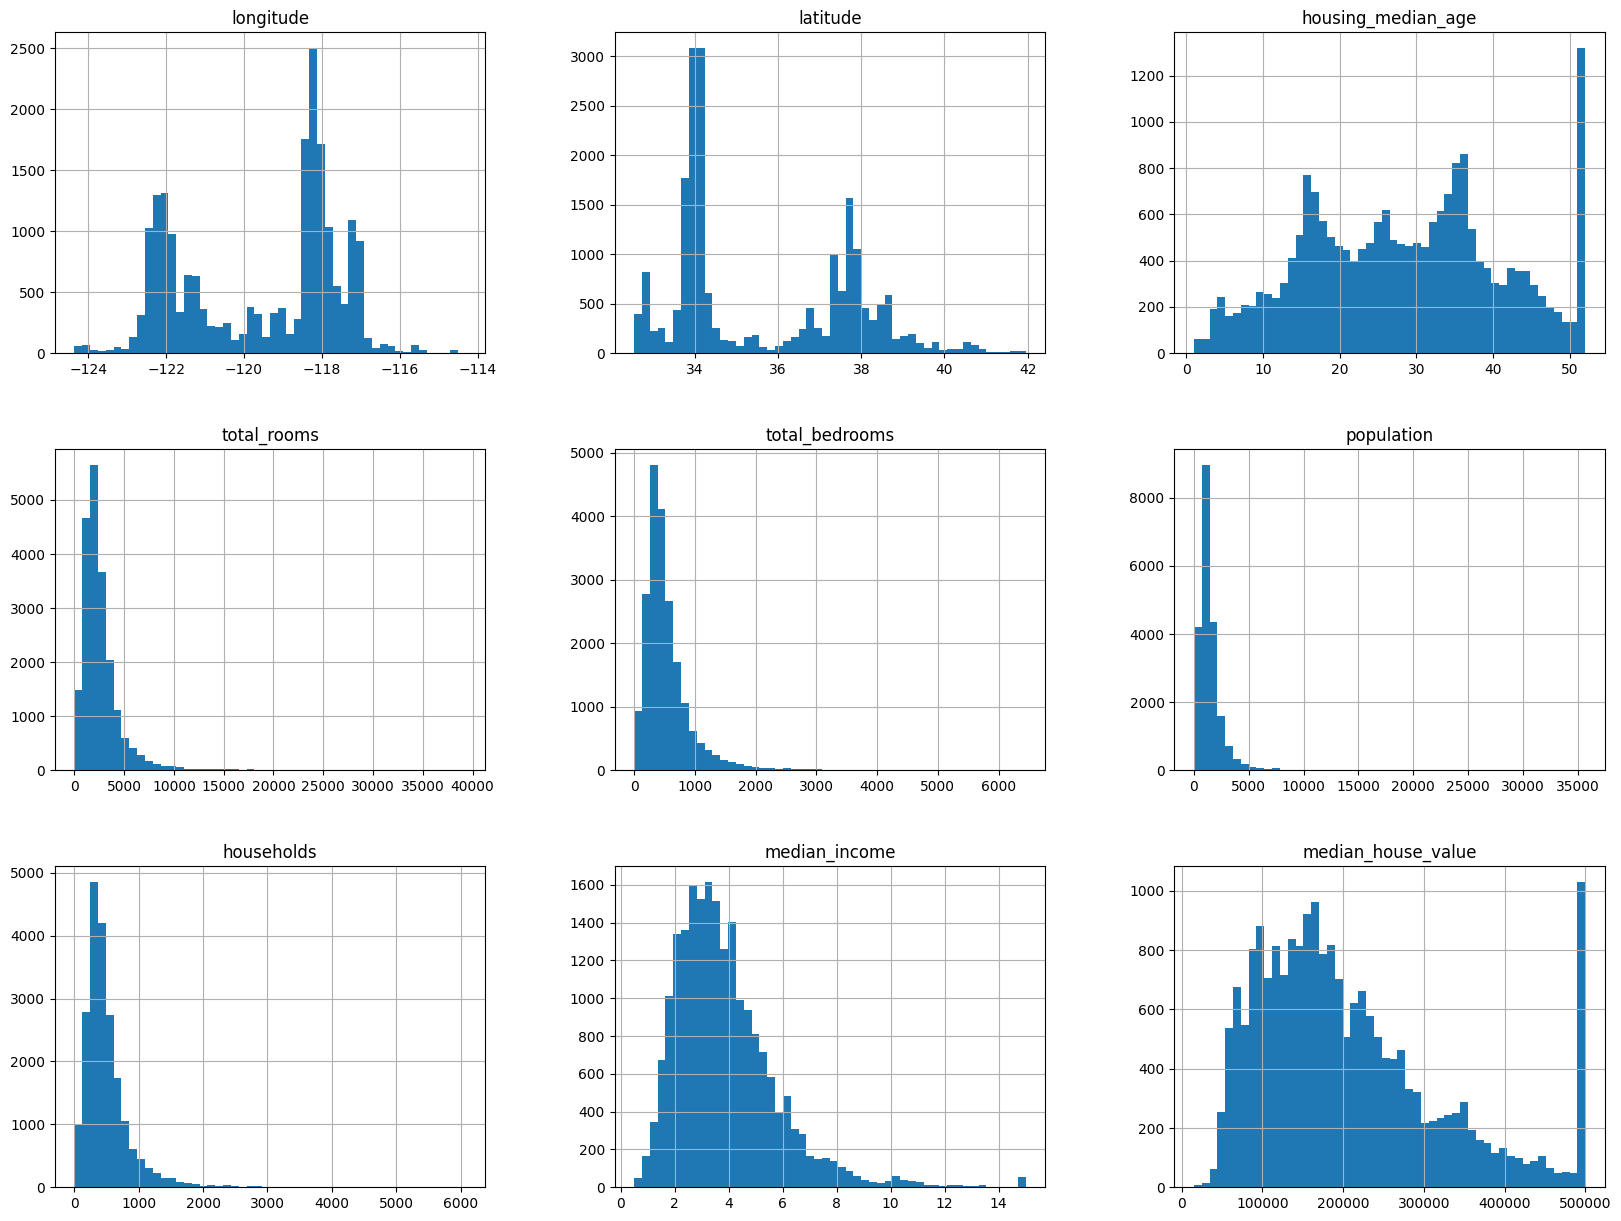

In [8]:
housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [9]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0, 1.5, 3, 4.5, 6, np.inf],
                               labels=[1, 2, 3, 4, 5])

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, test_idx in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.iloc[train_idx]
    strat_test_set = housing.iloc[test_idx]

In [11]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [12]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [13]:
housing["income_cat"].value_counts() / len(housing)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [14]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

/var/folders/mr/h8kbzcd56ld_p7f6cxrn0ykw0000gn/T/ipykernel_84131/1299016719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_cat", axis=1, inplace=True)
/var/folders/mr/h8kbzcd56ld_p7f6cxrn0ykw0000gn/T/ipykernel_84131/1299016719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_cat", axis=1, inplace=True)


In [15]:
train_set = strat_train_set.copy()

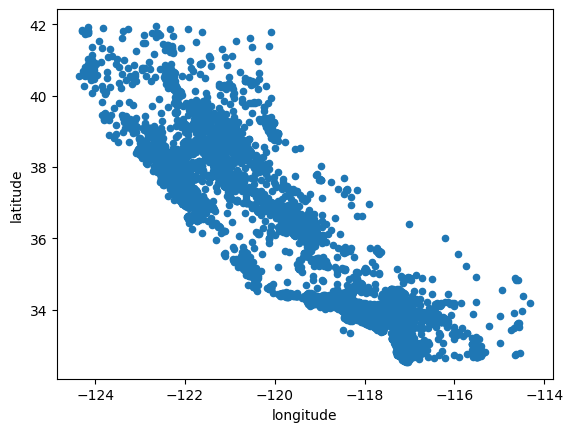

In [17]:
train_set.plot(kind="scatter", x="longitude", y="latitude")
plt.show()

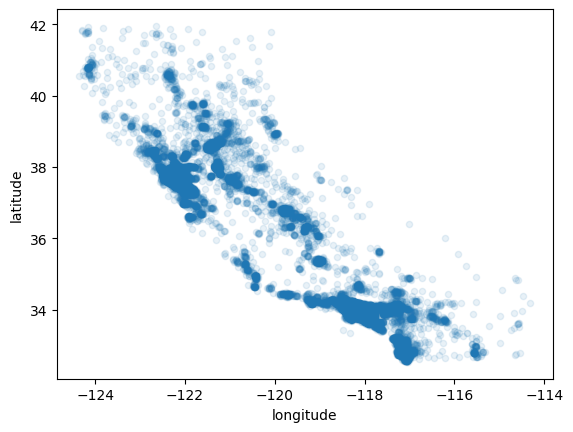

In [19]:
train_set.plot(kind="scatter", x="longitude", y="latitude",
               alpha=0.1)
plt.show()

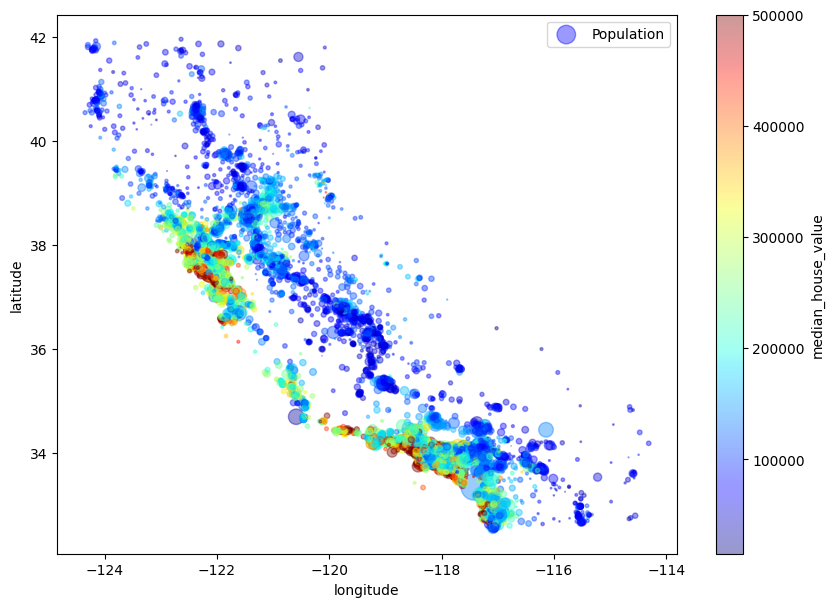

In [27]:
train_set.plot(kind="scatter", x="longitude", y="latitude",
               alpha=0.4, s=train_set["population"]/100, label="Population",
              c="median_house_value", cmap=plt.get_cmap("jet"), figsize=(10, 7),
               legend=True)
plt.show()

In [29]:
corr_matrix = train_set.corr(numeric_only=True)

In [32]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

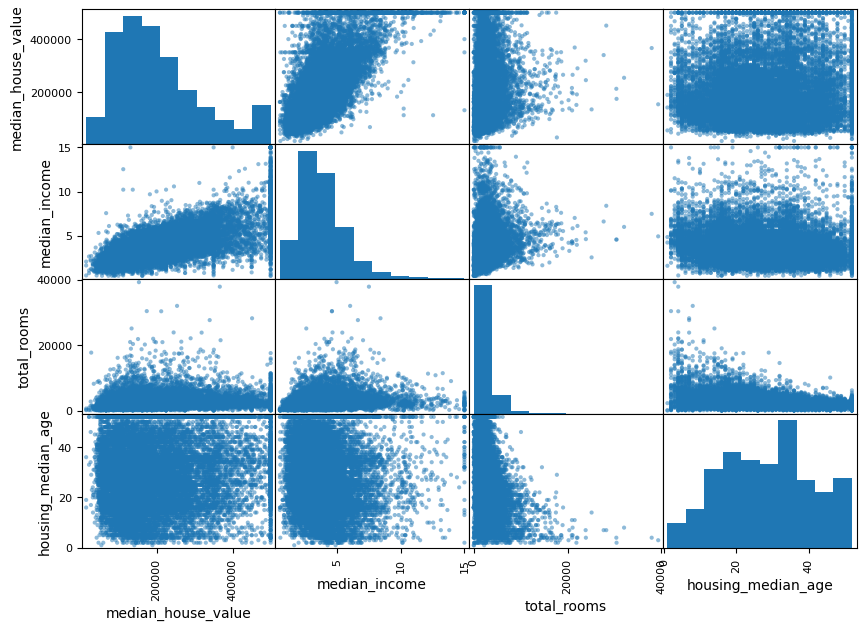

In [36]:
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
pd.plotting.scatter_matrix(train_set[attributes], figsize=(10, 7))
plt.show()

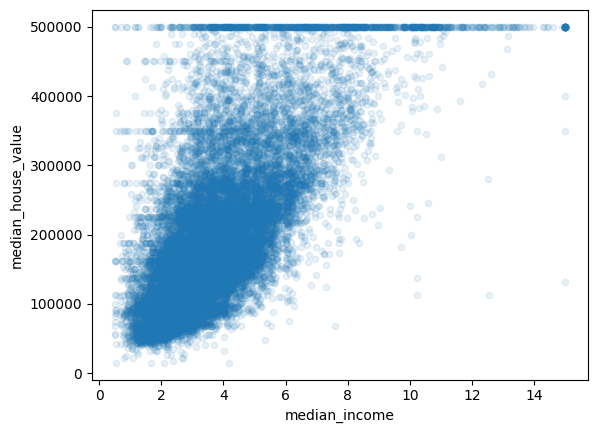

In [39]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.show()

In [40]:
train_set["rooms_per_household"] = train_set["total_rooms"]/train_set["households"]
train_set["bedrooms_per_room"] = train_set["total_bedrooms"]/train_set["total_rooms"]
train_set["population_per_household"] = train_set["population"]/train_set["households"]

In [43]:
corr_matrix = train_set.corr(numeric_only=True)

In [44]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [79]:
X = train_set.drop("median_house_value", axis=1)
y = train_set["median_house_value"].copy()

In [80]:
X_num = X.drop("ocean_proximity", axis=1)
X_cat = X[["ocean_proximity"]]

In [81]:
# median = X["total_bedrooms"].median()
# X.fillna({"total_bedrooms": median}, inplace=True)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

imputer.fit(X_num)
imputer.statistics_

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11900000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54155000e+00,
        5.23234164e+00,  2.03027043e-01,  2.81766108e+00])

In [82]:
X_temp = imputer.transform(X_num)
# X_num = pd.DataFrame(X_temp, columns=X_num.columns, index=X_num.index)

In [83]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
X_temp = cat_encoder.fit_transform(X_cat)

In [84]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

In [85]:
class CustomAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=False):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix]/X[:, households_ix]
        population_per_household = X[:, population_ix]/X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        return np.c_[X, rooms_per_household, population_per_household]

In [86]:
attr_adder = CustomAttributeAdder(add_bedrooms_per_room=True)
X_extra_attrs = attr_adder.fit_transform(X.values)

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CustomAttributeAdder(add_bedrooms_per_room=True)),
    ("scaler", RobustScaler()),
])

X_num_set = num_pipeline.fit_transform(X_num)

In [93]:
from sklearn.compose import ColumnTransformer

num_attribs = list(X_num)
cat_attribs = list(X_cat)

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

X_prepared = full_pipeline.fit_transform(X)

In [95]:
X_prepared.shape

(16512, 19)

In [97]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_prepared, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [101]:
X_sample = X.iloc[:5]
y_sample = y.iloc[:5]
X_sample_prepared = full_pipeline.transform(X_sample)
print(lin_reg.predict(X_sample_prepared))
print(y_sample.values)

[ 83836.78432038 305631.11438241 150098.65527848 187972.73800539
 241953.08535364]
[ 72100. 279600.  82700. 112500. 238300.]


In [102]:
from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(X_sample_prepared)
lin_mse = mean_squared_error(y_sample, predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

47047.69701091094


In [103]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_prepared, y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [106]:
model = dt_reg

X_sample = X.iloc[:5]
y_sample = y.iloc[:5]
X_sample_prepared = full_pipeline.transform(X_sample)

predictions = model.predict(X_sample_prepared)
lin_mse = mean_squared_error(y_sample, predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

0.0


In [113]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_reg, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
dt_rmse_scores = np.sqrt(-scores)
dt_rmse_scores, dt_rmse_scores.mean(), dt_rmse_scores.std()

(array([51296.7553051 , 49054.18990622, 46977.5148127 , 51878.75729764,
        47330.79612435, 51695.54631462, 52538.85103684, 49790.96201489,
        48566.01397571, 54163.65163369]),
 np.float64(50329.303842175395),
 np.float64(2236.921220940314))

In [112]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_prepared, y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [115]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(X_prepared, y)
grid_search.best_estimator_, grid_search.best_params_

(RandomForestRegressor(max_features=8, n_estimators=30),
 {'max_features': 8, 'n_estimators': 30})

In [117]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

65642.33976620792 {'max_features': 2, 'n_estimators': 3}
56813.89572802201 {'max_features': 2, 'n_estimators': 10}
54471.91313871117 {'max_features': 2, 'n_estimators': 30}
61205.57859362234 {'max_features': 4, 'n_estimators': 3}
54133.40571168947 {'max_features': 4, 'n_estimators': 10}
51820.52147985872 {'max_features': 4, 'n_estimators': 30}
61090.99793533365 {'max_features': 6, 'n_estimators': 3}
53512.7697950203 {'max_features': 6, 'n_estimators': 10}
51179.36648130302 {'max_features': 6, 'n_estimators': 30}
60717.74042700235 {'max_features': 8, 'n_estimators': 3}
53208.170678725844 {'max_features': 8, 'n_estimators': 10}
50984.0935677878 {'max_features': 8, 'n_estimators': 30}
64457.912552634996 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
55797.81856163072 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
61958.4638520942 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53934.114166770785 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

In [118]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([5.98791432e-02, 5.44241962e-02, 4.15987019e-02, 1.36004070e-02,
       1.32313347e-02, 1.26418657e-02, 1.24020185e-02, 3.46894496e-01,
       4.68762427e-02, 4.51333693e-02, 6.22176938e-02, 2.00606742e-02,
       7.10947196e-02, 4.79898341e-02, 1.16185426e-02, 1.35160381e-01,
       6.06823201e-05, 2.40978767e-03, 2.70590985e-03])

In [119]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(np.float64(0.34689449572937675), 'median_income'),
 (np.float64(0.13516038095636682), 'INLAND'),
 (np.float64(0.07109471961268833), 'pop_per_hhold'),
 (np.float64(0.06221769375190152), 'population_per_household'),
 (np.float64(0.05987914323117519), 'longitude'),
 (np.float64(0.05442419621653129), 'latitude'),
 (np.float64(0.04798983409256473), 'bedrooms_per_room'),
 (np.float64(0.04687624271895557), 'rooms_per_household'),
 (np.float64(0.04513336932855524), 'bedrooms_per_room'),
 (np.float64(0.04159870185396932), 'housing_median_age'),
 (np.float64(0.020060674199763366), 'rooms_per_hhold'),
 (np.float64(0.013600407019088035), 'total_rooms'),
 (np.float64(0.01323133473860393), 'total_bedrooms'),
 (np.float64(0.012641865676377529), 'population'),
 (np.float64(0.012402018459686324), 'households'),
 (np.float64(0.011618542575294545), '<1H OCEAN'),
 (np.float64(0.002705909847837785), 'NEAR OCEAN'),
 (np.float64(0.0024097876711907332), 'NEAR BAY'),
 (np.float64(6.068232007307943e-05), 'ISL

In [121]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

ValueError: columns are missing: {'population_per_household', 'bedrooms_per_room', 'rooms_per_household'}